# SciKit Learn

The [sklearn package](https://scikit-learn.org/stable/) provides a broad collection of data analysis and machine learning tools. These tools basically cover the whole process from data manipulation over fitting different models to the data and evaluating the results. Sklearn is based on **numpy** and may thus require that the data to analyse is provided as an numpy array. Results will also be returned as such arrays.   

The respective modules, i.e. classes and functions of different algorithms, are provided in an API which allows easy application basically without requiring knowledge about how the algorithm itself works. It goes without mentioning, that you should have some basic understanding about the particular strengths of an algorithm and any caveats when fitting a model to extract meaningful results.

In this course, we will present only a small portion of sklearn's functionality and refer to the [API's documentation](https://scikit-learn.org/stable/modules/classes.html).

Sklearn provides a kind of framework syntax for fitting models of different kinds:

- instantiate the respective (algorithm's) object. Here, the hyper parameters and options are set

- fit the data using this object

- evaluate the model or use the model for prediction 

We will now look at some basic procedures for analysing data using different methods.

To load our modules, we import them specifically from the `skikit-learn` (name for installation) package instead of importing the whole package.

## Data manipulation

When working with real data, the scale of your variables may differ dramatically. However, some algorithms work numerically more stable when the feature values are set in the same range. Some types of regression for example even require rescaling in order to work properly.

Sklearn provides several scaler classes to map all values to a desired range. Note however, that such rescaling may affect the interpretation of the results.

Let's have a look at the `StandardScaler` which is part of the `Preprocessing` module.  
It assumes a normal distribution of features. The rescaling is done by subtracting the mean and dividing by the standard deviation. 

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In the example below, we create an array filled with 1000 numbers drawn from a normal distribution with 2 two and standard deviation of 5.

Then, we instantiate the `StandardScaler` object.

Subsequently, we use its `.fit()` method, passing the simulated data as input. Note here the use of the array's `.reshape()` method, as StandardScaler objects require a 2D array.

At last, we create the rescaled data using `.transform()`.

x: mean = 2.000012408730963, std = 5.000701265739246
x rescaled: mean = -7.457856554538011e-18, std = 1.0000000000000002


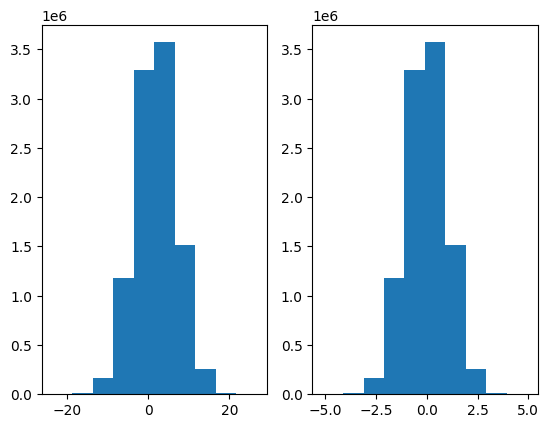

In [2]:
# synthetic data
x = np.random.normal(2,5,10000000)
print(f"x: mean = {x.mean()}, std = {x.std()}")
      
scaler = StandardScaler()
scaler.fit(x.reshape(-1,1))
x_rescaled = scaler.transform(x.reshape(-1,1))

print(f"x rescaled: mean = {x_rescaled.mean()}, std = {x_rescaled.std()}")

plt.subplot(1,2,1)
plt.hist(x)
plt.subplot(1,2,2)
plt.hist(x_rescaled)
plt.show()

We see the results printed above, with a mean of zero and a standard deviation of 1 (with a slight numerical deviation). From the histograms, we can also see that the transformed distribution on the right hand side is centered around zero, i.e. the mean is indeed shifted to zero. 

It is important to disambiguate the two occurrences of `x.reshape(-1,1)` as argument to the methods:
- `fit()`: the scaler 'learns' the parameters from the data, meaning it calculates the mean and std for this data specifically 

- `transform()`: the scaler applies the parameters calculated in the step before to center and rescale the data in its argument. The parameters are fixed for the `scaler` object, as long as `.fit()` is not called again on different data.

This means, that we can apply the same fitted parameters to another dataset using `.transform()` on this new data, as shown below.

In [3]:
x_alt = np.random.normal(2,5,10000000)
x_alt_scaled = scaler.transform(x_alt.reshape(-1,1))

print(f"x_alt: mean = {x_alt_scaled.mean()}, std = {x_alt_scaled.std()}")

x_alt: mean = 7.163890793489325e-05, std = 0.9996083224184403


At last, let's check what the fitted parameters are and do the 'transform' calculation ourselves to compare the result.

Fitted parameters in sklearn are saved as attributes to the fitting object, in this case `scaler`. We access them by `scaler.mean_` and `scaler.scale_`.
The mean of our calculation here reproduces the mean from the cell using the `.transform()` method.

In [4]:
calc_result = x_alt - scaler.mean_
calc_result /= scaler.scale_

print(calc_result.mean())

assert calc_result.mean() == x_alt_scaled.mean()

7.163890793489325e-05


When we want to transform the data without having to keep the original data, we can use the shortcut method of `.fit_transform()`, which combines the two methods used before into one. The results are the same as for using first `.fit()` and then `transform()`.

In [5]:
x_ft = scaler.fit_transform(x.reshape(-1,1))
print(f"x_alt: mean = {x_ft.mean()}, std = {x_ft.std()}")

x_alt: mean = -7.457856554538011e-18, std = 1.0000000000000002


There are more scalers available in sklearn which can be applied using the same syntax as shown here.

## Regression

### Linear Regression

A popular and widely used tool in data analysis is linear regression where we model the the influence of some independent numerical variables on the value of a dependent numerical variable (the target). 

We find the ordinary least squares regression readily available in sklearn's module `linear_model` as the `LinearRegression` class. An important note here is that by default, sklearn will fit an intercept. To exclude the intercept, set `fit_intercept=False` when instantiating the `LinearRegression` object.

We will use a [health insurance data set](https://www.kaggle.com/mirichoi0218/insurance/version/1#) with several variables, which we will use to try to explain the charges taken for the policy. We do have some categorical variables, for which we would need to create dummy variables to use in the regression directly. 

In [6]:
import pandas as pd
df = pd.read_csv("data/insurance.csv")
#df = df.select_dtypes(include=['int64', 'float64'])
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


To perform a simple linear regression, we proceed similar to above: 

- transform the pandas Series for independent and dependent variable to a numpy array, which we reshape to 2D 

- instantiate the object (default option `fit_intercept=True` included for illustrative reasons)

- call the `.fit()` method with positional arguments: first independent variable X, then y

At this point, the regression is done and we can access the parameters for the intercept and the variable's coefficient. Again, the syntax is similar as above for the StandardScaler.

In this example, we regress the charges for a policy on the body mass index of the customer.  

In [7]:
from sklearn.linear_model import LinearRegression

X = np.array(df.bmi).reshape(-1,1)
y = np.array(df.charges).reshape(-1,1)

linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,y)

print(f"intercept: {linreg.intercept_}, coefficient: {linreg.coef_}")

intercept: [1192.93720896], coefficient: [[393.8730308]]


What we find is a positive slope, `linreg.coef_` > 0, meaning that a higher bmi results in higher charges. To be precise, if your bmi increases by one unit, you will, on average, be charged 394 units more.

We can also see that the estimated parameters are returned as (nested) arrays. To get to the values, we must hence extract them accordingly.

In [8]:
print(f"intercept: {linreg.intercept_[0]}, coefficient: {linreg.coef_[0][0]}")

intercept: 1192.9372089611497, coefficient: 393.87303079739524


Now, we can generate the regression line and plot it together with the data to get a visualisation of the regression results. 

To do so, we simply pass the `X` values to the `.predict()` method and save the result as `y_pred`. We then use matplotlib to create a scatter plot of the data and a line plot of the regression line.

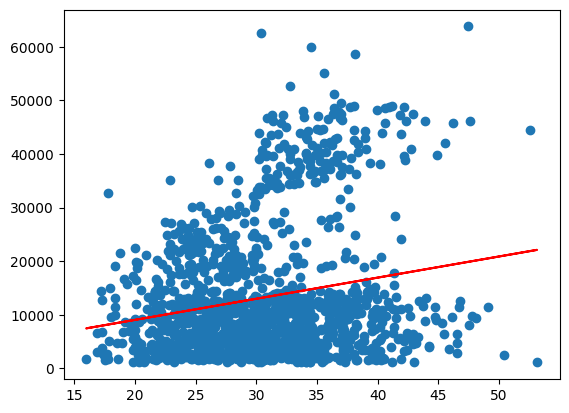

In [9]:
y_pred = linreg.predict(X)

plt.scatter(X, y)
plt.plot(X,y_pred, color='red')
plt.show()

In the case above, we used the data "seen" for prediction. We can easily extrapolate this to unseen data, by simply predicting for a larger value range.

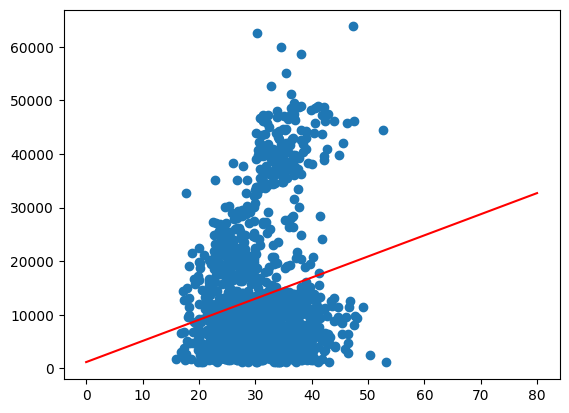

In [10]:
x_plot = np.linspace(0,80).reshape(-1,1)
y_extrapol = linreg.predict(x_plot)

plt.scatter(X, y)
plt.plot(x_plot,y_extrapol, color='red')
plt.show()

While we can clearly identify the trend of higher charges for older customers we can also see what appears to be three different groups. We will try to go into a little more detail about this later.

To evaluate, how well our model explains the data, we can calculate different measures.  
A quite common one is the coefficient of determination:

$$R^2 = 1 - \frac{\sum_i(y_i - \hat{y_i})^2}{\sum_i(y_i - \bar{y})^2}$$

With the predicted value $\hat{y_i}$ and the mean $\bar{y}$.

Thanks to sklearn, we do not have to calculate it from the results ourselves but find it in `sklearn.metrics`. To the `r2_score()` function, we pass as arguments the true y data and the prediction.

In [11]:
from sklearn.metrics import r2_score

r2_slr = r2_score(y, y_pred)
print(r2_slr)

0.03933913991786264


The result of about 4% is hardly satisfying and neither is the fit in the plot we saw above. From what we see in the graphic, the data may consist of different groups, one at the bottom and one stretching out on top. We will try to identify if we can identify them by variables in the data using seaborn's `hue` option.

As a first guess, we can look at 'smoker', since smokers can be expected to be charged higher. 

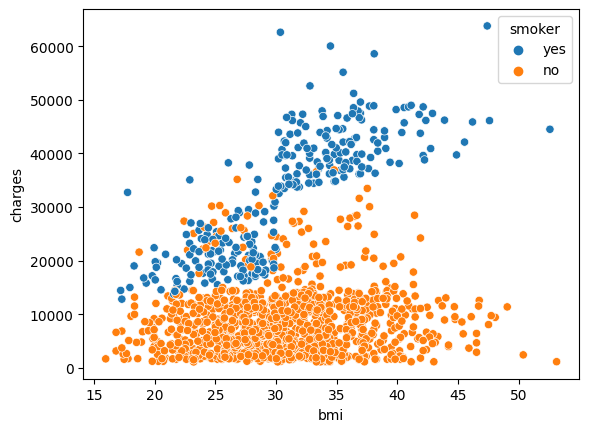

In [12]:
import seaborn as sns

sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
plt.show()

In fact, we see a rather clear distinction between smokers and non-smokers indicating that you will be charged higher in general when you smoke. It also appears that for smokers, the increase in charges is steeper for an increasing bmi than it is for non-smokers 

We now split the data accordingly and run a regression for each group to see if we can verify these assumptions.

In [13]:
X_smoker = np.array(df[df.smoker =='yes']['bmi']).reshape(-1,1)
y_smoker = np.array(df[df.smoker =='yes']['charges']).reshape(-1,1)

X_non_smoker = np.array(df[df.smoker =='no']['bmi']).reshape(-1,1)
y_non_smoker = np.array(df[df.smoker =='no']['charges']).reshape(-1,1)

linreg_smoker = LinearRegression(fit_intercept=True)
linreg_smoker.fit(X_smoker,y_smoker)
                        
linreg_non_smoker = LinearRegression(fit_intercept=True)
linreg_non_smoker.fit(X_non_smoker,y_non_smoker)

print(f"smoker: \nintercept: {linreg_smoker.intercept_}, coefficient: {linreg_smoker.coef_}")
print(f"non-smoker: \nintercept: {linreg_non_smoker.intercept_}, coefficient: {linreg_non_smoker.coef_}")

smoker: 
intercept: [-13186.57632276], coefficient: [[1473.1062547]]
non-smoker: 
intercept: [5879.42408187], coefficient: [[83.35055766]]


We see that the coefficient for the smokers is indeed much higher than for non-smokers. Regarding the intercept, we need to be aware, that it gives the value at bmi=0, which we should not consider relevant in reality. 

Let's also have a look at the plots.

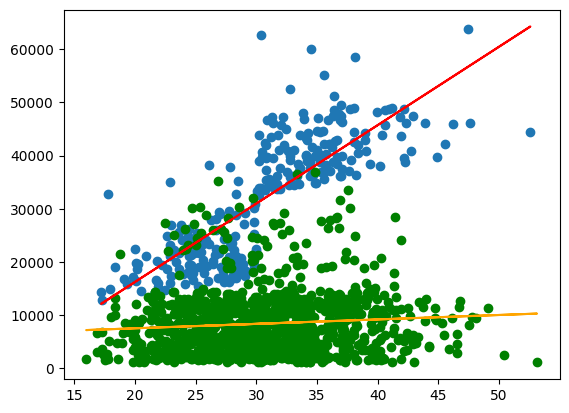

In [14]:
y_pred_sm = linreg_smoker.predict(X_smoker)
y_pred_non = linreg_non_smoker.predict(X_non_smoker)

plt.scatter(X_smoker, y_smoker,)
plt.plot(X_smoker,y_pred_sm, color='red')
plt.scatter(X_non_smoker, y_non_smoker, color='green')
plt.plot(X_non_smoker,y_pred_non, color='orange')
plt.show()

Finally, the $R^2$

In [15]:
r2_slr_sm = r2_score(y_smoker, y_pred_sm)
r2_slr_non = r2_score(y_non_smoker, y_pred_non)
print(f"smokers: {r2_slr_sm}, \nnon-smokers: {r2_slr_non}")

smokers: 0.6504109694921547, 
non-smokers: 0.007062140580960441


### Digression: statsmodels

At this point, we shortly look at an important point when it comes to regression: significance. We skipped this above, because sklearn has its shortcomings when it comes to this kind of 'classical statistics'. The calculation of p-values for example is not included and must be implemented by oneself.

For such purposes, we can switch to the [statsmodels package](https://www.statsmodels.org/stable/index.html) which may be a better choice to do all types of regression modelling as it comes with a broad output of test statistics and performance metrics.

Below, an example is given for the regression from above with the just slightly different statsmodels syntax. We see that using the `.summary()` method automatically outputs a table of information about the model. We can now, for example, look at the significance of the coefficients.

In [16]:
import statsmodels.api as sm

X_smoker = sm.add_constant(X_smoker)
X_non_smoker = sm.add_constant(X_non_smoker)

stats_smoker = sm.OLS(y_smoker, X_smoker)
res_smoker = stats_smoker.fit()
print(res_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     506.1
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           5.02e-64
Time:                        16:09:16   Log-Likelihood:                -2807.2
No. Observations:                 274   AIC:                             5618.
Df Residuals:                     272   BIC:                             5626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.319e+04   2052.885     -6.423      0.0

We can access the quantities from the table specifically, using the names listed when running `dir(res_smoker)`.

In [17]:
stats_non_smoker = sm.OLS(y_non_smoker, X_non_smoker)
res_non_smoker = stats_non_smoker.fit()
print(np.round(res_non_smoker.pvalues,3))

[0.    0.006]


## Supervised learning: Random Forests

The broad field of machine learning can be subdivided into supervised learning, unsupervised learning and reinforcement learning. For the first two, sklearn offers a variety of algorithms as plug and play functions. We will look at one example of supervised learning while introducing some basic concepts. 

We will train a classifier, i.e. a model that will predict a class for each observation. As we saw above, smokers and non smokers are separated quite well in the data. We would thus expect a model to learn to distinguish between those two classes.

We will use a [Random Forest](https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf) model which basically consists of a collection of randomized, decorrelated decision trees. It is a powerful algorithm for classification and can be used out of the box in sklearn.

In the following, we
- import the `RandomForestClassifier` for which we can use the usual sklearn `.fit()` and `.predict()` syntax

- import the `train_test_split()` function to create two separate sub-datasets from the original. This is a usual procedure in machine learning to check whether the model can generalize its prediction to new data. It randomly divides our X and y data into two parts each:
    - predictor and target variables (of the same size) for training, i.e. fitting the model
    - predictor and target variables (of the same size) for testing, i.e. evaluating the performance. These observations are not used in the training/fitting process!
    
  We set the ratio `test_size` to 0.4, so that 40% of the observation are reserved for testing and thus have not been seen by the algorithm before. 
  
- import `roc_auc_score`, a [metric which can be used to determine the performance of a classifier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

After creating the test and training datasets (using unpacking), we instantiate the random forest object and set `max_depth`, a hyperparamter, i.e. a model parameter which is not optimized by the algorithm but set by us, to four.

After the usual fit and predict calls, we print the roc-auc score using the test targets and the prediction for the test data.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_rf = df[['age', 'bmi', 'children', 'charges']]
y_rf = df.smoker == 'yes'

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.4, random_state= 1)

rf = RandomForestClassifier(max_depth=4, random_state=44)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9755105572862581


A result of about 97% shows that the model can indeed distinguish between the two classes very well, using the given predictor variables.

While decision trees are very well interpretable, by drawing, random forests lose this advantage due to the high number of trees used. We can however access the single trees, using the `.estimators_` attribute after fitting the model. It is a list of the length of trees used, by default as used here 100:

In [19]:
print(len(rf.estimators_))

100


Now, as a last demonstration of sklearn user-friendliness, we use `plot_tree` to plot the first tree built by the random forest. It will create a tree diagram, showing information about the splits made at each node. Note, that our choice of `max_depth` is reflected by the four child generations of the tree. 

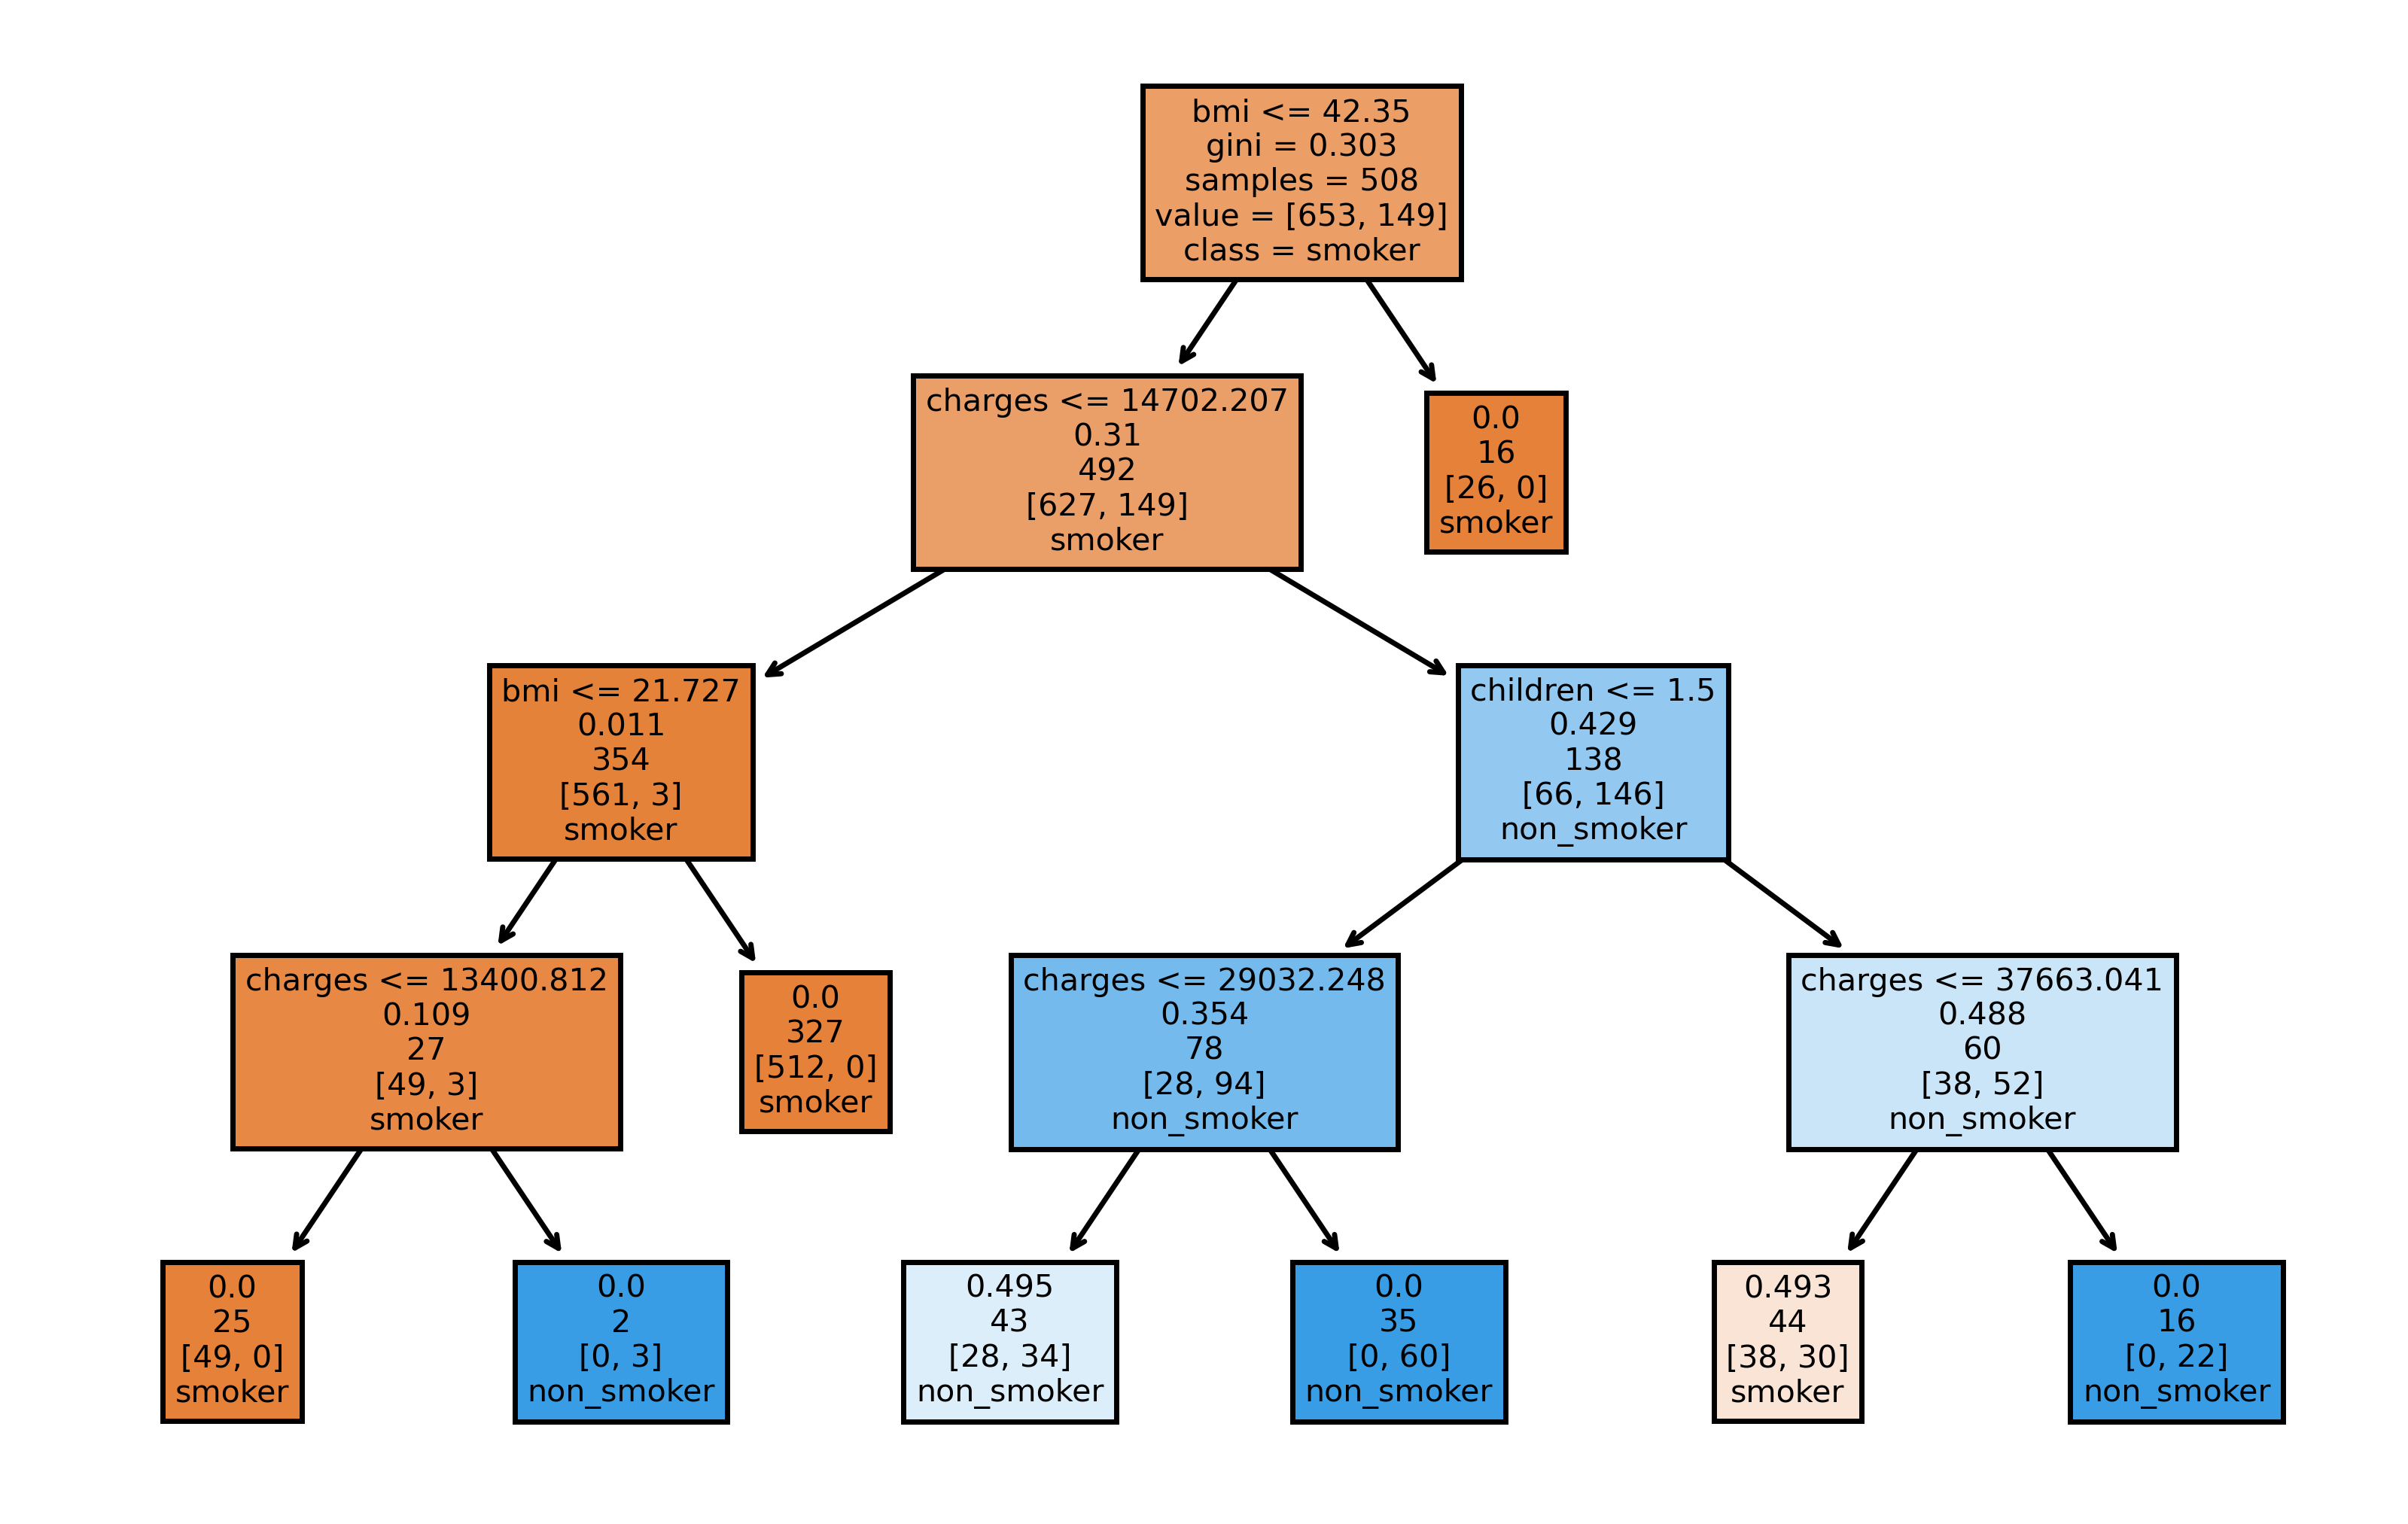

In [20]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 1, figsize=(8,5), dpi=500)
plot_tree(rf.estimators_[0],
          feature_names = X_rf.columns, 
          class_names=['smoker', 'non_smoker'],
          filled = True,
          label='root')
plt.show()